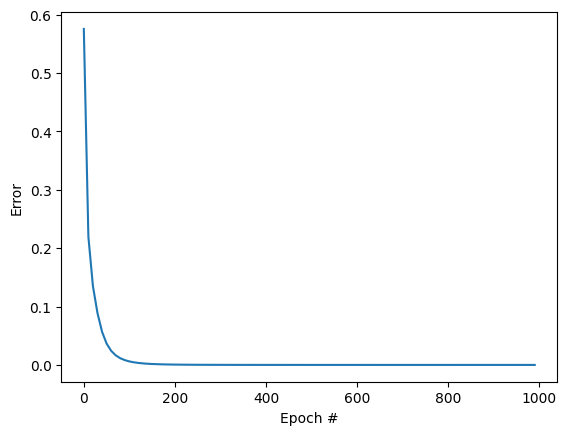

Input: [1 1], Predicted: [0.90292003 0.09763887], Target: [1 0]
Input: [1 0], Predicted: [0.08062957 0.91891821], Target: [0 1]
Input: [0 1], Predicted: [0.08091074 0.91863254], Target: [0 1]
Input: [0 0], Predicted: [8.29415769e-04 9.99155051e-01], Target: [0 1]

Final Weights: [[ 4.6601356   4.66392253]
 [-4.64764985 -4.65147781]]
Final Biases: [-7.09395924  7.07538857]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

N = 4
Nep = 1000
c = 0.5

x_train = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
d_train = np.array([[1, 0], [0, 1], [0, 1], [0, 1]])

e = np.zeros((N, 2))
W = np.random.random((2, 2))
b = np.random.random(2)

xarr = []
yarr = []

for ep in range(Nep):
    for n in range(N):
        x = x_train[n]
        d = d_train[n]
        v = np.dot(W, x) + b
        y = sigmoid(v)
        e = d - y

        delta = c * e * y * (1 - y)
        W += delta[:, np.newaxis] * x
        b += delta

    if ep % 10 == 0:
        xarr.append(ep)
        yarr.append(np.sum(e**2))

plt.plot(xarr, yarr)
plt.xlabel("Epoch #")
plt.ylabel("Error")
plt.show()

for n in range(N):
    v = np.dot(W, x_train[n]) + b
    y = sigmoid(v)
    print(f"Input: {x_train[n]}, Predicted: {y}, Target: {d_train[n]}")

print("\nFinal Weights:", W)
print("Final Biases:", b)

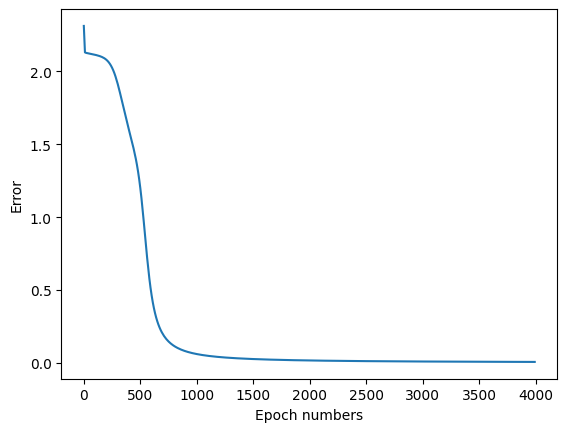

In [13]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
Nep = 4000
alpha = 0.5

def phi(x):
    return 1.0 / (1.0 + np.exp(-x))

x_train = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
d_train = np.array([[0, 1], [1, 0], [1, 0], [0, 1]])

W = np.random.random((2, 2))
b = np.random.random((2, 1))
V = np.random.random((2, 2))
c = np.random.random((2, 1))

xarr = []
yarr = []

for ep in range(Nep):
    sum_error = 0
    for n in range(N):
        x = np.reshape(x_train[n], (2, 1))
        d = np.reshape(d_train[n], (2, 1))

        v = W @ x + b
        y = phi(v)
        s = V @ y + c
        z = phi(s)

        e = d - z
        sum_error += np.sum(e ** 2)

        delta = z * (1 - z) * e
        epsilon = (V.T @ delta) * y * (1 - y)

        V += alpha * delta @ y.T
        c += alpha * delta
        W += alpha * epsilon @ x.T
        b += alpha * epsilon

    if ep % 10 == 0:
        xarr.append(ep)
        yarr.append(sum_error)

plt.plot(xarr, yarr)
plt.xlabel("Epoch numbers")
plt.ylabel("Error")
plt.show()